In [52]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFECV
from sklearn.manifold import TSNE


In [2]:
features = ["Team A Kills", "Team A Errors", "Team A Total Attacks", "Team A Hit Pct", "Team A Assists", "Team A Aces", "Team A SErr", "Team A Digs", "Team A RErr", "Team A Block Solos", "Team A Block Assists", "Team A BErr", "Team A PTS", "Team B Kills", "Team B Errors", "Team B Total Attacks", "Team B Hit Pct", "Team B Assists", "Team B Aces", "Team B SErr", "Team B Digs", "Team B RErr", "Team B Block Solos", "Team B Block Assists", "Team B BErr", "Team B PTS"]

matches_gathered_df = pd.read_csv('../../../data/ncaa/processed/2019/accumulated/matches_gathered.csv')
matches_gathered_X, matches_gathered_y = matches_gathered_df[features], matches_gathered_df["Result"]

sma_df = pd.read_csv('../../../data/ncaa/processed/2019/accumulated/10_sma.csv')
sma_X, sma_y = sma_df[features], sma_df["Result"]

cma_df = pd.read_csv( '../../../data/ncaa/processed/2019/accumulated/cma.csv')
cma_X, cma_y = cma_df[features], cma_df["Result"]

ewm_df = pd.read_csv('../../../data/ncaa/processed/2019/accumulated/0.2_ewm.csv')
ewm_X, ewm_y = ewm_df[features], ewm_df["Result"]

# Evaluating models with default parameters and all featuress

In [47]:
data_dict = {
    "matches_gathered": (matches_gathered_X, matches_gathered_y),
    "sma": (sma_X, sma_y),
    "cma": (cma_X, cma_y),
    "ewm": (ewm_X, ewm_y),
}

for name, (X, y) in data_dict.items():
    print(f"\n{name} -")
    X_scaled = StandardScaler().fit_transform(X)
    print(f"X.shape: {X.shape}, y.shape: {y.shape}")

    models = [
        XGBClassifier(),
        MLPClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
    ]
    result_dict = {"Model": [], "Accuracy Mean": [], "Accuracy Dev": []}
    for m in models:
        scores = cross_val_score(m, X_scaled, y, scoring="accuracy", cv=StratifiedKFold(), n_jobs=-1)
        result_dict["Model"].append(m.__class__.__name__)
        result_dict["Accuracy Mean"].append(scores.mean())
        result_dict["Accuracy Dev"].append(scores.std())

    results_df = pd.DataFrame(result_dict)
    print(f"Result on {name} -")
    print(results_df)
    print("-" * 50)



matches_gathered -
X.shape: (9536, 26), y.shape: (9536,)
Result on matches_gathered -
                    Model  Accuracy Mean  Accuracy Dev
0           XGBClassifier       0.916946      0.006083
1           MLPClassifier       0.921035      0.011356
2  RandomForestClassifier       0.913800      0.008220
3      LogisticRegression       0.933934      0.005869
4                     SVC       0.925440      0.007496
5  DecisionTreeClassifier       0.874265      0.010522
--------------------------------------------------

sma -
X.shape: (8891, 26), y.shape: (8891,)
Result on sma -
                    Model  Accuracy Mean  Accuracy Dev
0           XGBClassifier       0.739060      0.011357
1           MLPClassifier       0.736474      0.007186
2  RandomForestClassifier       0.749296      0.011533
3      LogisticRegression       0.761669      0.009273
4                     SVC       0.751433      0.007157
5  DecisionTreeClassifier       0.658756      0.006790
-------------------------------

In [48]:
np.mean(cross_val_score(LogisticRegression() , ewm_X, ewm_y, scoring='accuracy', cv=StratifiedKFold(), n_jobs=-1))

0.8002461538850645

In [52]:
np.mean(cross_val_score(MLPClassifier(hidden_layer_sizes=[128, 32], verbose=True), ewm_X, ewm_y, scoring='accuracy', cv=StratifiedKFold(), n_jobs=-1))

0.7820253286214434

In [61]:
ewm_df[features].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
models = [
    XGBClassifier,
    MLPClassifier,
    RandomForestClassifier,
    LogisticRegression,
    SVC,
    DecisionTreeClassifier,
]

vals = np.zeros((len(models), 26))
for i, model in enumerate(models):
    print(f"Evaluating for {model.__class__.__name__}:", end=' ')
    for k in range(1, 27):
        print(k, end=' ')
        ewm_X_selected = SelectKBest(score_func=f_classif, k=k).fit_transform(ewm_X, ewm_y)
        score = np.mean(cross_val_score(model() , ewm_X_selected, ewm_y, scoring='accuracy', cv=StratifiedKFold(), n_jobs=-1))
        vals[i][k-1] = score 
    print("Done!")

plt.figure(figsize=(10, 10))
plt.plot(vals.T, label=[m.__class__.__name__ for m in models])
plt.legend()


Evaluating for DecisionTreeClassifier ...
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 26 features.
Fitting estimator with 25 feat

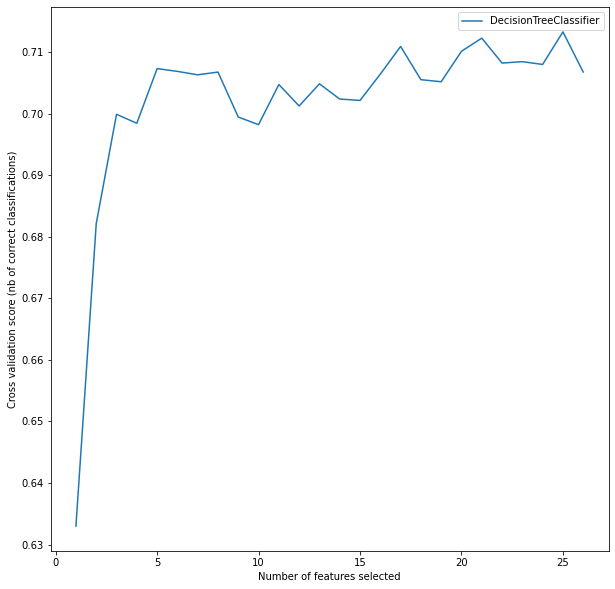

In [32]:
models = [
    # XGBClassifier,
    # MLPClassifier,
    # RandomForestClassifier,
    # LogisticRegression,
    # SVC,
    # LinearSVC,
    DecisionTreeClassifier,
]

ranks = np.zeros((len(models), 26))
plt.figure(figsize=(10, 10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
for i, model in enumerate(models):
    print(f"Evaluating for {model.__name__} ...")
    rfecv = RFECV(estimator=model(), cv=StratifiedKFold(), scoring='accuracy', verbose=2)
    rfecv.fit(ewm_X, ewm_y)
    ranks[i] = rfecv.ranking_
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, label=model.__name__)
    print("Done!")

plt.legend()


No handles with labels found to put in legend.


Text(0.5, 1.0, 'PCA of EWM Data')

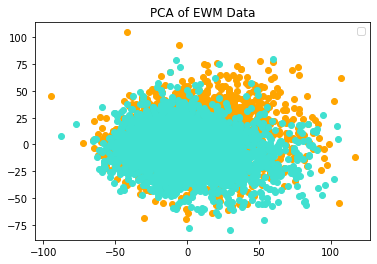

In [46]:
ewm_X_r = PCA(n_components=2).fit_transform(ewm_X)
plt.figure()
colors = ['orange', 'turquoise']
lw = 2

for i, c in enumerate(colors):
    plt.scatter(ewm_X_r[ewm_y == i, 0], ewm_X_r[ewm_y == i, 1], color=c)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of EWM Data')

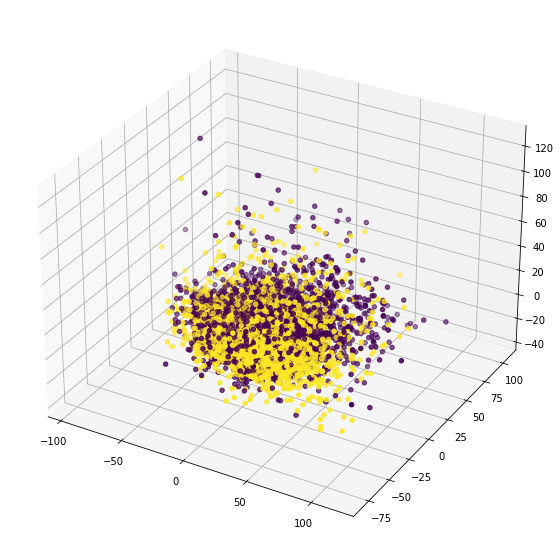

In [50]:
ewm_X_r = PCA(n_components=3).fit_transform(ewm_X)
ax = plt.figure(figsize=(16, 10)).gca(projection='3d')
ax.scatter(
    xs=ewm_X_r[:, 0],
    ys=ewm_X_r[:, 1],
    zs=ewm_X_r[:, 2],
    c=ewm_y,
)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8891 samples in 0.092s...
[t-SNE] Computed neighbors for 8891 samples in 5.757s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8891
[t-SNE] Computed conditional probabilities for sample 2000 / 8891
[t-SNE] Computed conditional probabilities for sample 3000 / 8891
[t-SNE] Computed conditional probabilities for sample 4000 / 8891
[t-SNE] Computed conditional probabilities for sample 5000 / 8891
[t-SNE] Computed conditional probabilities for sample 6000 / 8891
[t-SNE] Computed conditional probabilities for sample 7000 / 8891
[t-SNE] Computed conditional probabilities for sample 8000 / 8891
[t-SNE] Computed conditional probabilities for sample 8891 / 8891
[t-SNE] Mean sigma: 4.878472
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.410561
[t-SNE] KL divergence after 1000 iterations: 2.085524


<AxesSubplot:>

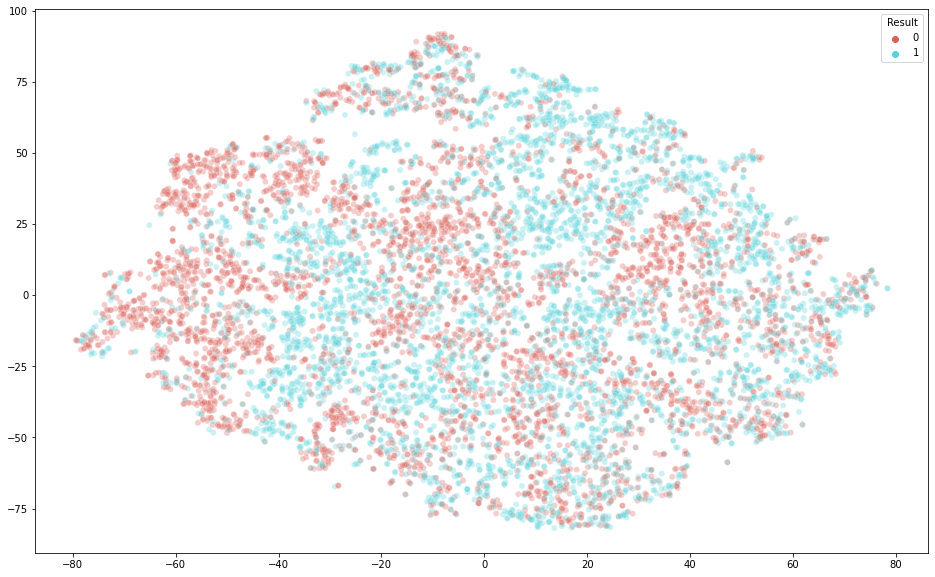

In [54]:
ewm_X_r = TSNE(n_components=2, verbose=1).fit_transform(ewm_X)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=ewm_X_r[:, 0], 
    y=ewm_X_r[:, 1],
    hue=ewm_y,
    palette=sns.color_palette("hls", 2),
    legend="full",
    alpha=0.3
)
